$$\star \star \star \star \star$$

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy.linalg
from scipy.linalg import eig
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Python

In [13]:
for i in range(1, 101):
    if (i % 10 == 0):
        print ""
    if (i % 3 == 0 and i % 5 == 0):
        print "FizzBuzz",
    else:
        if (i % 3 == 0):
            print "Fizz",
        else:
            if (i % 5 == 0):
                print "Buzz",
            else:
                print i,   

1 2 Fizz 4 Buzz Fizz 7 8 Fizz 
Buzz 11 Fizz 13 14 FizzBuzz 16 17 Fizz 19 
Buzz Fizz 22 23 Fizz Buzz 26 Fizz 28 29 
FizzBuzz 31 32 Fizz 34 Buzz Fizz 37 38 Fizz 
Buzz 41 Fizz 43 44 FizzBuzz 46 47 Fizz 49 
Buzz Fizz 52 53 Fizz Buzz 56 Fizz 58 59 
FizzBuzz 61 62 Fizz 64 Buzz Fizz 67 68 Fizz 
Buzz 71 Fizz 73 74 FizzBuzz 76 77 Fizz 79 
Buzz Fizz 82 83 Fizz Buzz 86 Fizz 88 89 
FizzBuzz 91 92 Fizz 94 Buzz Fizz 97 98 Fizz 
Buzz


In [160]:
def fibonacciNumber100():
    x = np.zeros(101)
    x[0] = 0
    x[1] = 1
    for i in range(2, 101):
        x[i] = x[i-1] + x[i-2]
    return int(x[100])

In [161]:
print fibonacciNumber100()

354224848179261997056


In [173]:
def quickSort(a):
    return quickSort1(a, 0, len(a)-1)

def quickSort1(a, l, r):
    x = a[l]
    i = l
    j = r
    while (i <= j):
        while (a[i] < x):
            i+= 1
        while (a[j] > x):
            j-= 1
        if (i <= j):
            a[i], a[j] = a[j], a[i]
            i+= 1
            j-= 1
    if (l < j):
        quickSort1(a, l, j)
    if (i < r):
        quickSort1(a, i, r)
    return a

In [203]:
def quickSortInOneLine(arr): 
     if len(arr) <= 1:
        return arr
     else:
        return qsort([x for x in arr[1:] if x<arr[0]]) + [arr[0]] + qsort([x for x in arr[1:] if x>=arr[0]])

In [221]:
test1 = st.norm.rvs(size = 500)
test2 = test1
test3 = test1

In [222]:
%%time
res1 = np.sort(test1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 108 µs


In [223]:
%%time
res2 = quickSort(test2)

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 2.83 ms


In [224]:
%%time
res3 = quickSortInOneLine(test3)

CPU times: user 52 ms, sys: 8 ms, total: 60 ms
Wall time: 54.3 ms


In [225]:
np.sum(test1 == test2)

500

In [226]:
np.sum(test1 == test3)

500

Обе сортировки работают корректно, но для сравнения по времени работы будем использовать только quickSort, так как quickSortInOneLine работает достаточно медленно

In [227]:
test1 = st.norm.rvs(size = 1000000)
test2 = test1

In [228]:
%%time
res1 = np.sort(test1)

CPU times: user 116 ms, sys: 0 ns, total: 116 ms
Wall time: 118 ms


In [229]:
%%time
res2 = quickSort(test2)

CPU times: user 7.31 s, sys: 20 ms, total: 7.33 s
Wall time: 7.3 s


### NumPy

In [63]:
def myLinspaceFor(start, stop, num):
    cur = float(start)
    ind = 0
    res = np.zeros(num)
    while (ind < num):
        res[ind] = cur
        ind+= 1
        cur+= float(stop-start) / num 
    return res

In [64]:
def myLinspaceListComp(start, stop, num):
    return np.array([float(start) + (float(stop-start) / num) * i  for i in range(0, num)])

In [68]:
myLinspaceFor(14, 27, 11)

array([ 14.        ,  15.18181818,  16.36363636,  17.54545455,
        18.72727273,  19.90909091,  21.09090909,  22.27272727,
        23.45454545,  24.63636364,  25.81818182])

In [69]:
myLinspaceListComp(14, 27, 11)

array([ 14.        ,  15.18181818,  16.36363636,  17.54545455,
        18.72727273,  19.90909091,  21.09090909,  22.27272727,
        23.45454545,  24.63636364,  25.81818182])

In [75]:
%%time
x1 = np.linspace(0, 1000, 10000000)

CPU times: user 68 ms, sys: 44 ms, total: 112 ms
Wall time: 114 ms


In [76]:
%%time
x1 = myLinspaceFor(0, 1000, 10000000)

CPU times: user 3.31 s, sys: 52 ms, total: 3.36 s
Wall time: 3.31 s


In [77]:
%%time
x1 = myLinspaceListComp(0, 1000, 10000000)

CPU times: user 5.02 s, sys: 48 ms, total: 5.07 s
Wall time: 5.04 s


In [101]:
N = 10000000

In [108]:
test1 = np.ones(N)
test2 = [1 for i in range(N)]

In [109]:
%%time
test1 += 1
print test1

[ 2.  2.  2. ...,  2.  2.  2.]
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 12.5 ms


In [110]:
%%time 
for i in range(N):
    test2[i]+=1

CPU times: user 1.38 s, sys: 48 ms, total: 1.43 s
Wall time: 1.41 s


In [111]:
test1[-1] = 10
test2[-1] = 10

In [112]:
%%time 
np.max(test1)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 5.21 ms


10.0

In [113]:
%%time
maximal = test2[0]
for i in range(1, N):
    if (maximal < test2[i]):
        maximal = test2[i]
maximal

CPU times: user 1.14 s, sys: 68 ms, total: 1.21 s
Wall time: 1.21 s


### Matplotlib

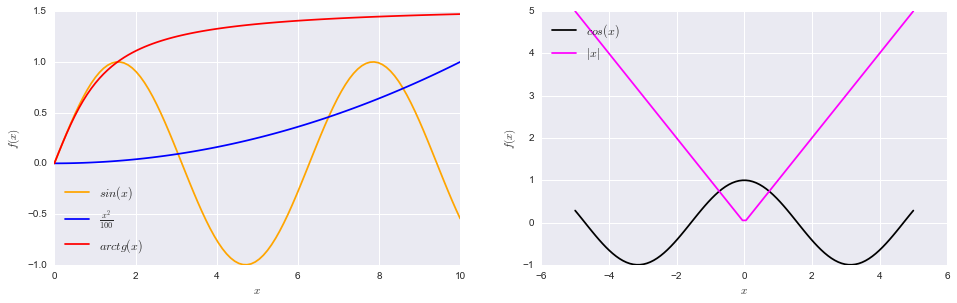

In [264]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(221)
ax1.plot(np.linspace(0, 10, 100), np.sin(np.linspace(0, 10, 100)), 
         color = "orange", label="$sin(x)$")
ax1.plot(np.linspace(0, 10, 100), np.power((np.linspace(0, 10, 100)), 2) / 100., 
         color = "blue", label=r'$\frac{x^2}{100}$')
ax1.plot(np.linspace(0, 10, 100), np.arctan(np.linspace(0, 10, 100)), 
         color = "red", label="$arctg(x)$")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.legend(loc = 3, prop={'size':12})

ax2 = fig.add_subplot(222)
ax2.plot(np.linspace(-5, 5, 100), np.cos(np.linspace(-5, 5, 100)), 
         color = "black", label="$cos(x)$")
ax2.plot(np.linspace(-5, 5, 100), np.abs(np.linspace(-5, 5, 100)), 
         color = "magenta", label="$|x|$")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$f(x)$")
ax2.legend(loc = 2, prop={'size':12})
pylab.savefig('my_plots.png')

### SciPy

In [467]:
A = st.norm.rvs(size=[5, 5])
A

array([[ 1.02475, -0.06533, -0.2911 , -0.02382, -0.36618],
       [-1.56582,  0.93364, -0.62275,  1.37798,  0.55627],
       [-0.57173, -1.67079,  1.54132,  0.52249,  0.82885],
       [-0.91077,  1.0917 , -0.21839,  0.00817, -1.27387],
       [-0.0021 ,  0.66801, -2.09237, -1.88736, -0.9071 ]])

In [468]:
eigvals, eigvectors = eig(A)
print "Собственные значения: ", eigvals
print "Собственные вектора: ", eigvectors

Собственные значения:  [-1.85886+0.j      -0.71107+0.j       1.41782+0.62715j  1.41782-0.62715j
  2.33507+0.j     ]
Собственные вектора:  [[ 0.01311+0.j      -0.14440+0.j      -0.00510+0.23061j -0.00510-0.23061j
  -0.02495+0.j     ]
 [-0.47405+0.j      -0.66740+0.j       0.05324+0.07582j  0.05324-0.07582j
   0.58128+0.j     ]
 [-0.44109+0.j      -0.58165+0.j      -0.34120-0.33079j -0.34120+0.33079j
  -0.64330+0.j     ]
 [ 0.57393+0.j       0.42233+0.j      -0.45506+0.16342j -0.45506-0.16342j
   0.07340+0.j     ]
 [ 0.50115+0.j      -0.13054+0.j       0.69179+0.j       0.69179-0.j
   0.49221+0.j     ]]


Проверяем, чтобы $\forall i $ $(A-\lambda_iE)v_i = 0$  

In [469]:
np.set_printoptions(precision=5)
for i in range(5):
    print np.dot(eigvals[i] * np.eye(5), eigvectors[:,i]) 

[-0.02438+0.j  0.88119+0.j  0.81993+0.j -1.06685+0.j -0.93157+0.j]
[ 0.10268+0.j  0.47457+0.j  0.41360+0.j -0.30031+0.j  0.09283+0.j]
[-0.15186+0.32376j  0.02794+0.14088j -0.27631-0.68299j -0.74769-0.05369j
  0.98084+0.43386j]
[-0.15186-0.32376j  0.02794-0.14088j -0.27631+0.68299j -0.74769+0.05369j
  0.98084-0.43386j]
[-0.05827+0.j  1.35734+0.j -1.50214+0.j  0.17139+0.j  1.14935+0.j]


In [470]:
np.set_printoptions(precision=5)
for i in range(5):
    print np.dot(A, eigvectors[:,i]) 

[-0.02438+0.j  0.88119+0.j  0.81993+0.j -1.06685+0.j -0.93157+0.j]
[ 0.10268+0.j  0.47457+0.j  0.41360+0.j -0.30031+0.j  0.09283+0.j]
[-0.15186+0.32376j  0.02794+0.14088j -0.27631-0.68299j -0.74769-0.05369j
  0.98084+0.43386j]
[-0.15186-0.32376j  0.02794-0.14088j -0.27631+0.68299j -0.74769+0.05369j
  0.98084-0.43386j]
[-0.05827+0.j  1.35734+0.j -1.50214+0.j  0.17139+0.j  1.14935+0.j]


In [471]:
np.set_printoptions(precision=4)
for i in range(5):
    print np.round(np.dot(A - eigvals[i] * np.eye(5), eigvectors[:,i]), 5)

[ 0.+0.j  0.+0.j  0.+0.j -0.+0.j -0.+0.j]
[ 0.+0.j  0.+0.j  0.+0.j -0.+0.j -0.+0.j]
[ 0.-0.j -0.+0.j  0.+0.j  0.+0.j -0.-0.j]
[ 0.+0.j -0.-0.j  0.-0.j  0.-0.j -0.+0.j]
[-0.+0.j -0.+0.j  0.+0.j  0.+0.j -0.+0.j]
